In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
#from sklearn_genetic import GAFeatureSelectionCV

In [29]:

# # --- Load CSV ---
# data = pd.read_csv('./radiomics_features_washu2_p1_143_with_labels.csv')

# # --- Prepare features and labels ---
# X = data.drop(columns=['PatientID', 'GT'])
# y = (data['GT']<1).astype(int)  # Convert GT to binary labels

# # --- Split train/test ---
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [31]:
import pandas as pd
from sklearn.model_selection import GroupShuffleSplit

# --- Load the data ---
data = pd.read_csv('./radiomics_features_washu2_p1_143_center_label.csv')

data = data[data['PatientID']<=120] 

# --- Prepare features and labels ---  
X = data.drop(columns=['PatientID', 'GT', 'Side', 'ImagePath', 'Unnamed: 0'])
y = (data['GT'] < 1).astype(int)

# --- Group labels by PatientID ---
groups = data['PatientID']

# --- Split train/test based on PatientID groups ---
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

train_idx, test_idx = next(gss.split(X, y, groups))
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# ✅ Done!
print(f"Train patients: {groups.iloc[train_idx].nunique()} | Test patients: {groups.iloc[test_idx].nunique()}")
print(f"Train samples: {len(X_train)} | Test samples: {len(X_test)}")


Train patients: 55 | Test patients: 14
Train samples: 529 | Test samples: 173


In [32]:
selected_features = ['original_shape2D_Elongation', 'original_shape2D_MeshSurface', 'original_shape2D_MinorAxisLength', 'original_shape2D_PerimeterSurfaceRatio', 'original_shape2D_PixelSurface', 'original_shape2D_Sphericity', 'original_firstorder_Energy', 'original_firstorder_InterquartileRange', 'original_firstorder_Kurtosis', 'original_firstorder_Mean', 'original_firstorder_Minimum', 'original_firstorder_Skewness', 'original_firstorder_Uniformity', 'original_glcm_ClusterShade', 'original_glcm_Correlation', 'original_glcm_DifferenceAverage', 'original_glcm_DifferenceVariance', 'original_glcm_Id', 'original_glcm_Idmn', 'original_glcm_JointAverage', 'original_glcm_JointEntropy', 'original_glcm_SumEntropy', 'original_glcm_SumSquares', 'original_glrlm_HighGrayLevelRunEmphasis', 'original_glrlm_LongRunEmphasis', 'original_glrlm_LongRunLowGrayLevelEmphasis', 'original_glrlm_RunEntropy', 'original_glrlm_RunLengthNonUniformityNormalized', 'original_glrlm_RunPercentage', 'original_glrlm_RunVariance', 'original_glrlm_ShortRunEmphasis', 'original_glszm_GrayLevelNonUniformity', 'original_glszm_GrayLevelNonUniformityNormalized', 'original_glszm_LargeAreaHighGrayLevelEmphasis', 'original_glszm_LowGrayLevelZoneEmphasis', 'original_glszm_SizeZoneNonUniformity', 'original_glszm_SmallAreaHighGrayLevelEmphasis', 'original_glszm_ZonePercentage', 'original_glszm_ZoneVariance', 'wavelet-H_firstorder_10Percentile', 'wavelet-H_firstorder_90Percentile', 'wavelet-H_firstorder_InterquartileRange', 'wavelet-H_firstorder_Mean', 'wavelet-H_firstorder_Range', 'wavelet-H_firstorder_RobustMeanAbsoluteDeviation', 'wavelet-H_firstorder_Skewness', 'wavelet-H_firstorder_Uniformity', 'wavelet-H_firstorder_Variance', 'wavelet-H_glcm_ClusterProminence', 'wavelet-H_glcm_ClusterTendency', 'wavelet-H_glcm_Contrast', 'wavelet-H_glcm_Correlation', 'wavelet-H_glcm_DifferenceAverage', 'wavelet-H_glcm_DifferenceEntropy', 'wavelet-H_glcm_DifferenceVariance', 'wavelet-H_glcm_Idmn', 'wavelet-H_glcm_Imc2', 'wavelet-H_glcm_InverseVariance', 'wavelet-H_glcm_JointAverage', 'wavelet-H_glcm_JointEntropy', 'wavelet-H_glcm_MCC', 'wavelet-H_glcm_SumAverage', 'wavelet-H_glcm_SumSquares', 'wavelet-H_glrlm_GrayLevelNonUniformityNormalized', 'wavelet-H_glrlm_LongRunEmphasis', 'wavelet-H_glrlm_ShortRunEmphasis', 'wavelet-H_glrlm_ShortRunHighGrayLevelEmphasis', 'wavelet-H_glszm_GrayLevelNonUniformityNormalized', 'wavelet-H_glszm_LargeAreaEmphasis', 'wavelet-H_glszm_LargeAreaHighGrayLevelEmphasis', 'wavelet-H_glszm_LargeAreaLowGrayLevelEmphasis', 'wavelet-H_glszm_LowGrayLevelZoneEmphasis', 'wavelet-H_glszm_SizeZoneNonUniformityNormalized', 'wavelet-H_glszm_ZonePercentage', 'wavelet-H_glszm_ZoneVariance', 'wavelet-L_firstorder_10Percentile', 'wavelet-L_firstorder_Energy', 'wavelet-L_firstorder_Entropy', 'wavelet-L_firstorder_InterquartileRange', 'wavelet-L_firstorder_Kurtosis', 'wavelet-L_firstorder_Maximum', 'wavelet-L_firstorder_MeanAbsoluteDeviation', 'wavelet-L_firstorder_Mean', 'wavelet-L_firstorder_Minimum', 'wavelet-L_firstorder_Range', 'wavelet-L_firstorder_RobustMeanAbsoluteDeviation', 'wavelet-L_firstorder_RootMeanSquared', 'wavelet-L_firstorder_TotalEnergy', 'wavelet-L_firstorder_Uniformity', 'wavelet-L_glcm_ClusterProminence', 'wavelet-L_glcm_ClusterShade', 'wavelet-L_glcm_Contrast', 'wavelet-L_glcm_DifferenceEntropy', 'wavelet-L_glcm_Imc2', 'wavelet-L_glcm_JointAverage', 'wavelet-L_glcm_JointEntropy', 'wavelet-L_glcm_SumEntropy', 'wavelet-L_glrlm_HighGrayLevelRunEmphasis', 'wavelet-L_glrlm_LongRunHighGrayLevelEmphasis', 'wavelet-L_glrlm_RunEntropy', 
'wavelet-L_glrlm_RunPercentage', 'wavelet-L_glrlm_ShortRunEmphasis', 'wavelet-L_glrlm_ShortRunHighGrayLevelEmphasis', 'wavelet-L_glszm_GrayLevelNonUniformity', 'wavelet-L_glszm_GrayLevelVariance', 'wavelet-L_glszm_LargeAreaEmphasis', 'wavelet-L_glszm_SizeZoneNonUniformityNormalized', 'wavelet-L_glszm_SmallAreaEmphasis', 
'wavelet-L_glszm_ZonePercentage', 'wavelet-L_glszm_ZoneVariance']

In [33]:
# selected features based on multiple models
selected_features = ['original_shape2D_Elongation', 'original_shape2D_MajorAxisLength', 'original_shape2D_Perimeter', 'original_shape2D_PerimeterSurfaceRatio', 'original_shape2D_PixelSurface', 'original_firstorder_10Percentile', 'original_firstorder_90Percentile', 'original_firstorder_Entropy', 'original_firstorder_Kurtosis', 'original_firstorder_Median', 'original_firstorder_Range', 'original_firstorder_RootMeanSquared', 'original_glcm_Contrast', 'original_glcm_DifferenceAverage', 'original_glcm_DifferenceEntropy', 'original_glcm_DifferenceVariance', 'original_glcm_Id', 'original_glcm_Idm', 'original_glcm_Imc1', 'original_glcm_JointEnergy', 'original_glcm_SumEntropy', 'original_glrlm_GrayLevelNonUniformity', 'original_glrlm_GrayLevelVariance', 'original_glrlm_HighGrayLevelRunEmphasis', 'original_glrlm_LongRunEmphasis', 'original_glrlm_LowGrayLevelRunEmphasis', 'original_glrlm_RunLengthNonUniformityNormalized', 'original_glrlm_RunVariance', 'original_glrlm_ShortRunEmphasis', 'original_glrlm_ShortRunLowGrayLevelEmphasis', 'original_glszm_HighGrayLevelZoneEmphasis', 'original_glszm_LargeAreaHighGrayLevelEmphasis', 'original_glszm_SizeZoneNonUniformityNormalized', 'original_glszm_SmallAreaEmphasis', 'original_glszm_SmallAreaLowGrayLevelEmphasis', 'wavelet-H_firstorder_90Percentile', 'wavelet-H_firstorder_Energy', 'wavelet-H_firstorder_Median', 'wavelet-H_firstorder_Minimum', 'wavelet-H_firstorder_RootMeanSquared', 'wavelet-H_glcm_Autocorrelation', 'wavelet-H_glcm_ClusterProminence', 'wavelet-H_glcm_ClusterTendency', 'wavelet-H_glcm_Idm', 'wavelet-H_glcm_Idmn', 'wavelet-H_glcm_Imc1', 'wavelet-H_glcm_Imc2', 'wavelet-H_glcm_JointAverage', 'wavelet-H_glcm_JointEnergy', 'wavelet-H_glcm_SumAverage', 'wavelet-H_glrlm_GrayLevelNonUniformity', 'wavelet-H_glrlm_LongRunEmphasis', 'wavelet-H_glrlm_ShortRunEmphasis', 'wavelet-H_glrlm_ShortRunHighGrayLevelEmphasis', 'wavelet-H_glrlm_ShortRunLowGrayLevelEmphasis', 'wavelet-H_glszm_GrayLevelNonUniformity', 'wavelet-H_glszm_LargeAreaEmphasis', 'wavelet-H_glszm_LargeAreaHighGrayLevelEmphasis', 'wavelet-H_glszm_SizeZoneNonUniformityNormalized', 'wavelet-L_firstorder_Kurtosis', 'wavelet-L_firstorder_Maximum', 'wavelet-L_firstorder_Mean', 'wavelet-L_firstorder_Skewness', 'wavelet-L_firstorder_TotalEnergy', 'wavelet-L_firstorder_Uniformity', 'wavelet-L_glcm_DifferenceAverage', 'wavelet-L_glcm_DifferenceEntropy', 'wavelet-L_glcm_DifferenceVariance', 'wavelet-L_glcm_Id', 'wavelet-L_glcm_Idn', 'wavelet-L_glcm_Imc2', 'wavelet-L_glcm_JointEnergy', 'wavelet-L_glcm_MCC', 'wavelet-L_glcm_MaximumProbability', 'wavelet-L_glcm_SumSquares', 'wavelet-L_glrlm_GrayLevelNonUniformity', 'wavelet-L_glrlm_GrayLevelNonUniformityNormalized', 'wavelet-L_glrlm_HighGrayLevelRunEmphasis', 'wavelet-L_glrlm_RunLengthNonUniformityNormalized', 'wavelet-L_glrlm_ShortRunEmphasis', 'wavelet-L_glrlm_ShortRunHighGrayLevelEmphasis', 'wavelet-L_glszm_LargeAreaHighGrayLevelEmphasis', 'wavelet-L_glszm_SizeZoneNonUniformityNormalized', 'wavelet-L_glszm_SmallAreaLowGrayLevelEmphasis', 'wavelet-L_glszm_ZoneVariance', 'original_shape2D_Sphericity', 'original_firstorder_TotalEnergy', 'original_glcm_ClusterProminence', 'original_glcm_ClusterTendency', 'original_glcm_JointEntropy', 'original_glcm_MCC', 'original_glcm_MaximumProbability', 'original_glrlm_GrayLevelNonUniformityNormalized', 'original_glszm_LargeAreaLowGrayLevelEmphasis', 'original_glszm_ZoneEntropy', 'wavelet-H_firstorder_Maximum', 'wavelet-H_glcm_Correlation', 'wavelet-H_glcm_DifferenceEntropy', 'wavelet-H_glcm_JointEntropy', 'wavelet-H_glcm_SumEntropy', 'wavelet-H_glrlm_LongRunHighGrayLevelEmphasis', 'wavelet-H_glrlm_RunLengthNonUniformity', 'wavelet-H_glszm_SmallAreaEmphasis', 'wavelet-L_firstorder_10Percentile', 'wavelet-L_firstorder_Energy', 'wavelet-L_firstorder_Entropy', 'wavelet-L_firstorder_InterquartileRange', 'wavelet-L_glcm_Correlation', 'wavelet-L_glcm_InverseVariance', 'wavelet-L_glcm_JointAverage', 'wavelet-L_glrlm_RunLengthNonUniformity', 'original_shape2D_MinorAxisLength', 'original_firstorder_InterquartileRange', 'wavelet-H_glcm_ClusterShade', 'wavelet-H_glrlm_LongRunLowGrayLevelEmphasis', 'wavelet-L_glcm_Imc1', 'wavelet-L_glszm_HighGrayLevelZoneEmphasis', 'wavelet-L_glszm_LowGrayLevelZoneEmphasis', 'wavelet-L_glszm_SmallAreaEmphasis']

In [34]:
selected_features = ['original_shape2D_MinorAxisLength', 'original_firstorder_Entropy', 'original_firstorder_Range', 'original_firstorder_Skewness', 'original_firstorder_Uniformity', 'original_glcm_ClusterProminence', 'original_glcm_JointAverage', 'original_glcm_MCC', 'original_glrlm_LongRunHighGrayLevelEmphasis', 'original_glrlm_RunLengthNonUniformity', 'original_glszm_HighGrayLevelZoneEmphasis', 'original_glszm_LargeAreaEmphasis', 'original_glszm_SmallAreaHighGrayLevelEmphasis', 'original_glszm_ZonePercentage', 'original_glszm_ZoneVariance', 'wavelet-H_firstorder_10Percentile', 'wavelet-H_glcm_Id', 'wavelet-H_glcm_Idn', 'wavelet-H_glrlm_LongRunEmphasis', 'wavelet-H_glrlm_ShortRunHighGrayLevelEmphasis', 'wavelet-H_glszm_ZonePercentage', 'wavelet-H_glszm_ZoneVariance', 'wavelet-L_glcm_Idm', 'wavelet-L_glcm_Imc1', 'wavelet-L_glcm_MaximumProbability', 'wavelet-L_glcm_SumAverage', 'wavelet-L_glrlm_LongRunHighGrayLevelEmphasis', 'wavelet-L_glrlm_RunLengthNonUniformityNormalized', 'wavelet-L_glrlm_RunVariance', 'wavelet-L_glszm_GrayLevelNonUniformityNormalized', 'wavelet-L_glszm_LargeAreaEmphasis', 'wavelet-L_glszm_SmallAreaEmphasis', 'original_firstorder_Minimum', 'original_glcm_SumEntropy', 'original_glrlm_LongRunLowGrayLevelEmphasis', 'wavelet-H_glcm_ClusterProminence', 'wavelet-H_glcm_DifferenceAverage', 'wavelet-H_glcm_Imc1', 'wavelet-L_firstorder_Kurtosis', 'wavelet-L_glcm_SumEntropy', 'wavelet-L_glrlm_GrayLevelNonUniformityNormalized']

In [35]:
# Reduce data to selected features
X_train_selected = X_train #[selected_features]
X_test_selected = X_test #[selected_features]

In [36]:
print(y_test.sum(), "positive cases")
print(len(y_test) - y_test.sum(), "negative cases")
print(1 - y_test.sum()/len(y_test), "negative cases")
print(y_train.sum(), "positive cases")
print(1 - y_train.sum()/len(y_train), "negative cases")

24 positive cases
149 negative cases
0.8612716763005781 negative cases
96 positive cases
0.8185255198487713 negative cases


In [37]:
# --- Train different models ---
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}


c:\Users\mdiqb\anaconda3\envs\py312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


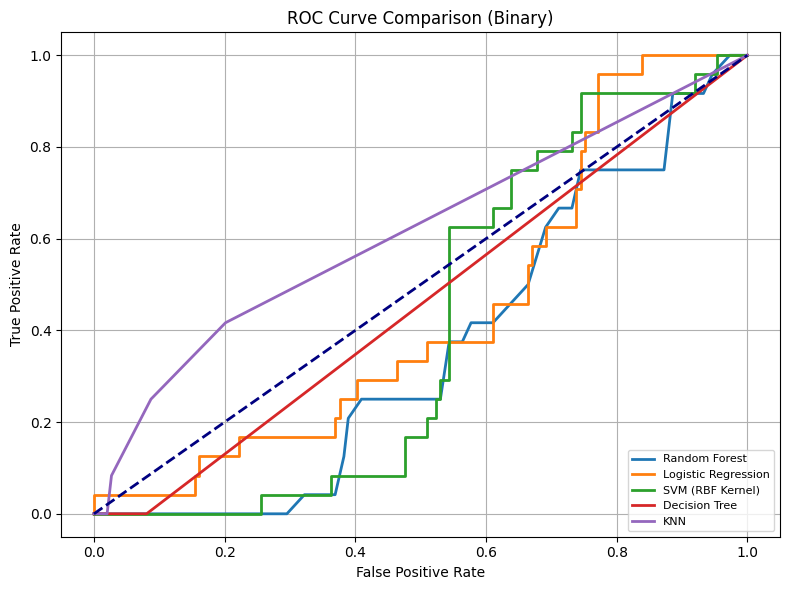

Random Forest: Accuracy = 0.751, ROC AUC = 0.362
Logistic Regression: Accuracy = 0.653, ROC AUC = 0.440
SVM (RBF Kernel): Accuracy = 0.861, ROC AUC = 0.411
Decision Tree: Accuracy = 0.792, ROC AUC = 0.460
KNN: Accuracy = 0.821, ROC AUC = 0.614


In [38]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

results = {}
roc_curves = {}  # Will store FPR, TPR for each model

for name, clf in models.items():
    clf.fit(X_train_selected, y_train)

    # Predictions
    y_pred = clf.predict(X_test_selected)
    y_proba = clf.predict_proba(X_test_selected)[:, 1]  # Positive class only

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    try:
        roc_auc = roc_auc_score(y_test, y_proba)  # Binary ROC AUC
    except Exception as e:
        roc_auc = np.nan
        print(f"⚠️ {name} AUC could not be calculated: {e}")

    results[name] = {"Accuracy": acc, "ROC AUC": roc_auc}

    # Store ROC curve
    if not np.isnan(roc_auc):
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_curves[name] = (fpr, tpr)

# --- Plot ROC curves for all models (binary) ---
plt.figure(figsize=(8, 6))
for model_name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, lw=2, label=f'{model_name}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Binary)')
plt.legend(loc="lower right", fontsize=8)
plt.grid()
plt.tight_layout()
plt.show()

# Optional: Print Results
for model_name, metrics in results.items():
    print(f"{model_name}: Accuracy = {metrics['Accuracy']:.3f}, ROC AUC = {metrics['ROC AUC']:.3f}")


# Boundary Based Radiomics Classification

Train patients: 55 | Test patients: 14
Train samples: 529 | Test samples: 173
24 positive cases
149 negative cases
0.8612716763005781 negative cases
96 positive cases
0.8185255198487713 negative cases


c:\Users\mdiqb\anaconda3\envs\py312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


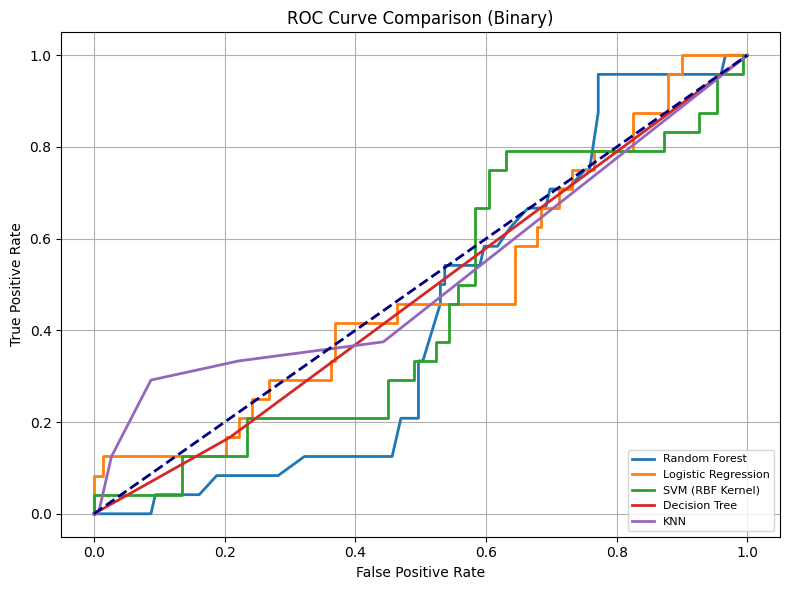

Random Forest: Accuracy = 0.642, ROC AUC = 0.429
Logistic Regression: Accuracy = 0.636, ROC AUC = 0.487
SVM (RBF Kernel): Accuracy = 0.861, ROC AUC = 0.451
Decision Tree: Accuracy = 0.705, ROC AUC = 0.479
KNN: Accuracy = 0.827, ROC AUC = 0.517


In [39]:
# --- Load the data ---
data = pd.read_csv('./radiomics_features_washu2_p1_143_boundary_label.csv')

# training and validating for samples less than 120 
data = data[data['PatientID']<=120] 

# --- Prepare features and labels ---  
X = data.drop(columns=['PatientID', 'GT', 'Side', 'ImagePath', 'Unnamed: 0'])
y = (data['GT'] < 1).astype(int)

# --- Group labels by PatientID ---
groups = data['PatientID']

# --- Split train/test based on PatientID groups ---
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

train_idx, test_idx = next(gss.split(X, y, groups))
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# ✅ Done!
print(f"Train patients: {groups.iloc[train_idx].nunique()} | Test patients: {groups.iloc[test_idx].nunique()}")
print(f"Train samples: {len(X_train)} | Test samples: {len(X_test)}")


# Reduce data to selected features
X_train_selected = X_train #[selected_features]
X_test_selected = X_test #[selected_features]

# %%
print(y_test.sum(), "positive cases")
print(len(y_test) - y_test.sum(), "negative cases")
print(1 - y_test.sum()/len(y_test), "negative cases")
print(y_train.sum(), "positive cases")
print(1 - y_train.sum()/len(y_train), "negative cases")

# %%
# --- Train different models ---
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}


# %%
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

results = {}
roc_curves = {}  # Will store FPR, TPR for each model

for name, clf in models.items():
    clf.fit(X_train_selected, y_train)

    # Predictions
    y_pred = clf.predict(X_test_selected)
    y_proba = clf.predict_proba(X_test_selected)[:, 1]  # Positive class only

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    try:
        roc_auc = roc_auc_score(y_test, y_proba)  # Binary ROC AUC
    except Exception as e:
        roc_auc = np.nan
        print(f"⚠️ {name} AUC could not be calculated: {e}")

    results[name] = {"Accuracy": acc, "ROC AUC": roc_auc}

    # Store ROC curve
    if not np.isnan(roc_auc):
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_curves[name] = (fpr, tpr)

# --- Plot ROC curves for all models (binary) ---
plt.figure(figsize=(8, 6))
for model_name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, lw=2, label=f'{model_name}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Binary)')
plt.legend(loc="lower right", fontsize=8)
plt.grid()
plt.tight_layout()
plt.show()

# Optional: Print Results
for model_name, metrics in results.items():
    print(f"{model_name}: Accuracy = {metrics['Accuracy']:.3f}, ROC AUC = {metrics['ROC AUC']:.3f}")

# Boundary and Center combined based classification

In [133]:
import pandas as pd
import os
import re

In [135]:
# Load data
data_center = pd.read_csv("radiomics_features_washu2_p1_143_center_label.csv")
data_boundary = pd.read_csv("radiomics_features_washu2_p1_143_boundary_label.csv")

def extract_image_key(path):
    # Matches p10/R/filename.ext (where ext = jpg, png, jpeg, bmp, tiff, etc.)
    match = re.search(r'(p\d+/[LRC]/[^/]+\.(jpg|jpeg|png|bmp|tiff))$', path, re.IGNORECASE)
    if match:
        return match.group(1).replace('/', '_')  # Converts p10/R/1.jpg → p10_R_1.jpg
    return None

data_center['image_key'] = data_center['ImagePath'].apply(extract_image_key)
data_boundary['image_key'] = data_boundary['ImagePath'].apply(extract_image_key)

# Step 2: Check for duplicates
assert not data_center['image_key'].duplicated().any(), "Duplicate image_key in center data"
assert not data_boundary['image_key'].duplicated().any(), "Duplicate image_key in boundary data"

# Step 3: Set index to image_key for alignment and sanity check
data_center.set_index('image_key', inplace=True)
data_boundary.set_index('image_key', inplace=True)

# Step 4: Sanity check: alignable keys
assert data_center.index.equals(data_boundary.index), "Mismatch in image_key between center and boundary"

# Step 5: Check matching PatientID, Side, GT
meta_cols = ['PatientID', 'Side', 'GT']
for col in meta_cols:
    if not (data_center[col] == data_boundary[col]).all():
        raise ValueError(f"Mismatch in column '{col}' between center and boundary data")

# Step 6: Extract features only and prefix them
center_feats = data_center.drop(columns=meta_cols + ['ImagePath']).add_prefix('center_')
boundary_feats = data_boundary.drop(columns=meta_cols + ['ImagePath']).add_prefix('boundary_')
meta_df = data_center[meta_cols]  # Or data_boundary, same at this point

# Step 7: Concatenate
merged = pd.concat([meta_df.reset_index(), center_feats.reset_index(drop=True), boundary_feats.reset_index(drop=True)], axis=1)
data = merged 

# # Optional: Save
# merged.to_csv("merged_center_boundary_features.csv", index=False)


In [136]:

data = data[data['PatientID']<=120] 
# --- Prepare features and labels ---  
X = data.drop(columns=['PatientID', 'GT', 'Side', 'image_key'])
y = (data['GT'] < 1).astype(int)

# --- Group labels by PatientID ---
groups = data['PatientID']

# --- Split train/test based on PatientID groups ---
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

train_idx, test_idx = next(gss.split(X, y, groups))
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# ✅ Done!
print(f"Train patients: {groups.iloc[train_idx].nunique()} | Test patients: {groups.iloc[test_idx].nunique()}")
print(f"Train samples: {len(X_train)} | Test samples: {len(X_test)}")


Train patients: 55 | Test patients: 14
Train samples: 529 | Test samples: 173


In [137]:
# selected features based on multiple models
selected_features = ['original_shape2D_Elongation', 'original_shape2D_MajorAxisLength', 'original_shape2D_Perimeter', 'original_shape2D_PerimeterSurfaceRatio', 'original_shape2D_PixelSurface', 'original_firstorder_10Percentile', 'original_firstorder_90Percentile', 'original_firstorder_Entropy', 'original_firstorder_Kurtosis', 'original_firstorder_Median', 'original_firstorder_Range', 'original_firstorder_RootMeanSquared', 'original_glcm_Contrast', 'original_glcm_DifferenceAverage', 'original_glcm_DifferenceEntropy', 'original_glcm_DifferenceVariance', 'original_glcm_Id', 'original_glcm_Idm', 'original_glcm_Imc1', 'original_glcm_JointEnergy', 'original_glcm_SumEntropy', 'original_glrlm_GrayLevelNonUniformity', 'original_glrlm_GrayLevelVariance', 'original_glrlm_HighGrayLevelRunEmphasis', 'original_glrlm_LongRunEmphasis', 'original_glrlm_LowGrayLevelRunEmphasis', 'original_glrlm_RunLengthNonUniformityNormalized', 'original_glrlm_RunVariance', 'original_glrlm_ShortRunEmphasis', 'original_glrlm_ShortRunLowGrayLevelEmphasis', 'original_glszm_HighGrayLevelZoneEmphasis', 'original_glszm_LargeAreaHighGrayLevelEmphasis', 'original_glszm_SizeZoneNonUniformityNormalized', 'original_glszm_SmallAreaEmphasis', 'original_glszm_SmallAreaLowGrayLevelEmphasis', 'wavelet-H_firstorder_90Percentile', 'wavelet-H_firstorder_Energy', 'wavelet-H_firstorder_Median', 'wavelet-H_firstorder_Minimum', 'wavelet-H_firstorder_RootMeanSquared', 'wavelet-H_glcm_Autocorrelation', 'wavelet-H_glcm_ClusterProminence', 'wavelet-H_glcm_ClusterTendency', 'wavelet-H_glcm_Idm', 'wavelet-H_glcm_Idmn', 'wavelet-H_glcm_Imc1', 'wavelet-H_glcm_Imc2', 'wavelet-H_glcm_JointAverage', 'wavelet-H_glcm_JointEnergy', 'wavelet-H_glcm_SumAverage', 'wavelet-H_glrlm_GrayLevelNonUniformity', 'wavelet-H_glrlm_LongRunEmphasis', 'wavelet-H_glrlm_ShortRunEmphasis', 'wavelet-H_glrlm_ShortRunHighGrayLevelEmphasis', 'wavelet-H_glrlm_ShortRunLowGrayLevelEmphasis', 'wavelet-H_glszm_GrayLevelNonUniformity', 'wavelet-H_glszm_LargeAreaEmphasis', 'wavelet-H_glszm_LargeAreaHighGrayLevelEmphasis', 'wavelet-H_glszm_SizeZoneNonUniformityNormalized', 'wavelet-L_firstorder_Kurtosis', 'wavelet-L_firstorder_Maximum', 'wavelet-L_firstorder_Mean', 'wavelet-L_firstorder_Skewness', 'wavelet-L_firstorder_TotalEnergy', 'wavelet-L_firstorder_Uniformity', 'wavelet-L_glcm_DifferenceAverage', 'wavelet-L_glcm_DifferenceEntropy', 'wavelet-L_glcm_DifferenceVariance', 'wavelet-L_glcm_Id', 'wavelet-L_glcm_Idn', 'wavelet-L_glcm_Imc2', 'wavelet-L_glcm_JointEnergy', 'wavelet-L_glcm_MCC', 'wavelet-L_glcm_MaximumProbability', 'wavelet-L_glcm_SumSquares', 'wavelet-L_glrlm_GrayLevelNonUniformity', 'wavelet-L_glrlm_GrayLevelNonUniformityNormalized', 'wavelet-L_glrlm_HighGrayLevelRunEmphasis', 'wavelet-L_glrlm_RunLengthNonUniformityNormalized', 'wavelet-L_glrlm_ShortRunEmphasis', 'wavelet-L_glrlm_ShortRunHighGrayLevelEmphasis', 'wavelet-L_glszm_LargeAreaHighGrayLevelEmphasis', 'wavelet-L_glszm_SizeZoneNonUniformityNormalized', 'wavelet-L_glszm_SmallAreaLowGrayLevelEmphasis', 'wavelet-L_glszm_ZoneVariance', 'original_shape2D_Sphericity', 'original_firstorder_TotalEnergy', 'original_glcm_ClusterProminence', 'original_glcm_ClusterTendency', 'original_glcm_JointEntropy', 'original_glcm_MCC', 'original_glcm_MaximumProbability', 'original_glrlm_GrayLevelNonUniformityNormalized', 'original_glszm_LargeAreaLowGrayLevelEmphasis', 'original_glszm_ZoneEntropy', 'wavelet-H_firstorder_Maximum', 'wavelet-H_glcm_Correlation', 'wavelet-H_glcm_DifferenceEntropy', 'wavelet-H_glcm_JointEntropy', 'wavelet-H_glcm_SumEntropy', 'wavelet-H_glrlm_LongRunHighGrayLevelEmphasis', 'wavelet-H_glrlm_RunLengthNonUniformity', 'wavelet-H_glszm_SmallAreaEmphasis', 'wavelet-L_firstorder_10Percentile', 'wavelet-L_firstorder_Energy', 'wavelet-L_firstorder_Entropy', 'wavelet-L_firstorder_InterquartileRange', 'wavelet-L_glcm_Correlation', 'wavelet-L_glcm_InverseVariance', 'wavelet-L_glcm_JointAverage', 'wavelet-L_glrlm_RunLengthNonUniformity', 'original_shape2D_MinorAxisLength', 'original_firstorder_InterquartileRange', 'wavelet-H_glcm_ClusterShade', 'wavelet-H_glrlm_LongRunLowGrayLevelEmphasis', 'wavelet-L_glcm_Imc1', 'wavelet-L_glszm_HighGrayLevelZoneEmphasis', 'wavelet-L_glszm_LowGrayLevelZoneEmphasis', 'wavelet-L_glszm_SmallAreaEmphasis']

# %%
selected_features = ['original_shape2D_MinorAxisLength', 'original_firstorder_Entropy', 'original_firstorder_Range', 'original_firstorder_Skewness', 'original_firstorder_Uniformity', 'original_glcm_ClusterProminence', 'original_glcm_JointAverage', 'original_glcm_MCC', 'original_glrlm_LongRunHighGrayLevelEmphasis', 'original_glrlm_RunLengthNonUniformity', 'original_glszm_HighGrayLevelZoneEmphasis', 'original_glszm_LargeAreaEmphasis', 'original_glszm_SmallAreaHighGrayLevelEmphasis', 'original_glszm_ZonePercentage', 'original_glszm_ZoneVariance', 'wavelet-H_firstorder_10Percentile', 'wavelet-H_glcm_Id', 'wavelet-H_glcm_Idn', 'wavelet-H_glrlm_LongRunEmphasis', 'wavelet-H_glrlm_ShortRunHighGrayLevelEmphasis', 'wavelet-H_glszm_ZonePercentage', 'wavelet-H_glszm_ZoneVariance', 'wavelet-L_glcm_Idm', 'wavelet-L_glcm_Imc1', 'wavelet-L_glcm_MaximumProbability', 'wavelet-L_glcm_SumAverage', 'wavelet-L_glrlm_LongRunHighGrayLevelEmphasis', 'wavelet-L_glrlm_RunLengthNonUniformityNormalized', 'wavelet-L_glrlm_RunVariance', 'wavelet-L_glszm_GrayLevelNonUniformityNormalized', 'wavelet-L_glszm_LargeAreaEmphasis', 'wavelet-L_glszm_SmallAreaEmphasis', 'original_firstorder_Minimum', 'original_glcm_SumEntropy', 'original_glrlm_LongRunLowGrayLevelEmphasis', 'wavelet-H_glcm_ClusterProminence', 'wavelet-H_glcm_DifferenceAverage', 'wavelet-H_glcm_Imc1', 'wavelet-L_firstorder_Kurtosis', 'wavelet-L_glcm_SumEntropy', 'wavelet-L_glrlm_GrayLevelNonUniformityNormalized']


In [138]:
# %%
# Reduce data to selected features
X_train_selected = X_train #[selected_features]
X_test_selected = X_test #[selected_features]

# %%
print(y_test.sum(), "positive cases")
print(len(y_test) - y_test.sum(), "negative cases")
print(1 - y_test.sum()/len(y_test), "negative cases")
print(y_train.sum(), "positive cases")
print(1 - y_train.sum()/len(y_train), "negative cases")

24 positive cases
149 negative cases
0.8612716763005781 negative cases
96 positive cases
0.8185255198487713 negative cases


In [140]:
# %%
# --- Train different models ---
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}


# %%
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

results = {}
roc_curves = {}  # Will store FPR, TPR for each model

for name, clf in models.items():
    clf.fit(X_train_selected, y_train)

    # Predictions
    y_pred = clf.predict(X_test_selected)
    y_proba = clf.predict_proba(X_test_selected)[:, 1]  # Positive class only

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    try:
        roc_auc = roc_auc_score(y_test, y_proba)  # Binary ROC AUC
    except Exception as e:
        roc_auc = np.nan
        print(f"⚠️ {name} AUC could not be calculated: {e}")

    results[name] = {"Accuracy": acc, "ROC AUC": roc_auc}

    # Store ROC curve
    if not np.isnan(roc_auc):
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_curves[name] = (fpr, tpr)

c:\Users\mdiqb\anaconda3\envs\py312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


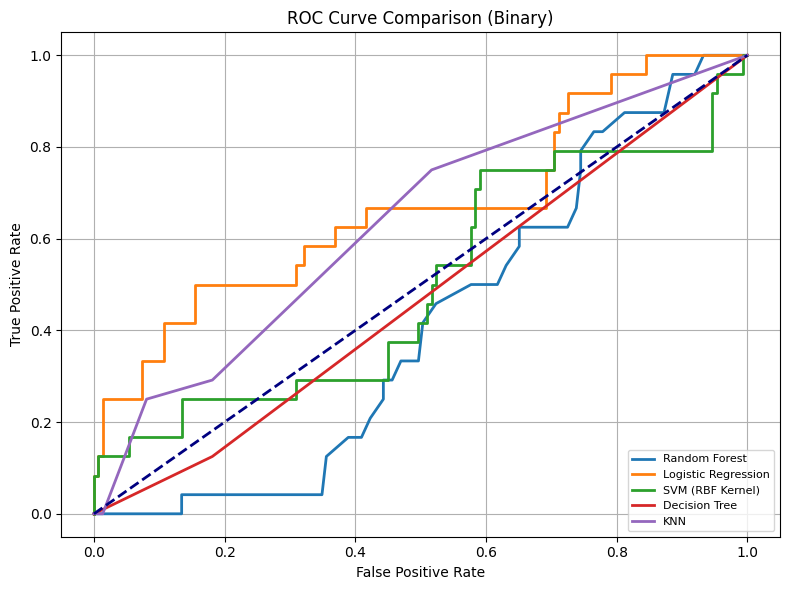

Random Forest: Accuracy = 0.792, ROC AUC = 0.411
Logistic Regression: Accuracy = 0.873, ROC AUC = 0.667
SVM (RBF Kernel): Accuracy = 0.861, ROC AUC = 0.501
Decision Tree: Accuracy = 0.723, ROC AUC = 0.472
KNN: Accuracy = 0.827, ROC AUC = 0.633


In [141]:
# --- Plot ROC curves for all models (binary) ---
plt.figure(figsize=(8, 6))
for model_name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, lw=2, label=f'{model_name}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Binary)')
plt.legend(loc="lower right", fontsize=8)
plt.grid()
plt.tight_layout()
plt.show()

# Optional: Print Results
for model_name, metrics in results.items():
    print(f"{model_name}: Accuracy = {metrics['Accuracy']:.3f}, ROC AUC = {metrics['ROC AUC']:.3f}")